## 2 Layer Neural network with softmax in the final layer
Meichen Lu (meichenlu91@gmail.com) 13rd April 2018

In this notebook, I will implement a simple 2-layer neural network with softmax. Then it will be tested on the MNIST data set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist.data.astype(float)
y = mnist.target.astype(float) 

m = X.shape[1]

In [3]:
# filter out only 0 and 1 and split data
ind = (y < 2).nonzero()
ind = ind[0]
X = X[ind, :]
n = np.shape(X)[0]
y_vec = np.zeros((n,2))
for i in range(n):
    y_vec[i,int(y[ind[i]])] = 1

num_train = int(n * 0.8)
X_train = X[0:num_train, :].T
X_test = X[num_train:-1,:].T
y_train = y_vec[0:num_train].T
y_test = y_vec[num_train:-1].T

X_train = X_train/256
X_test = X_test/256


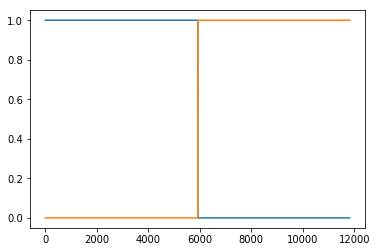

In [4]:
plt.plot(y_train[0,:])
plt.plot(y_train[1,:])

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def fprop(x, y, params):
    W1, b1, W2, b2 = [params[key] for key in ('W1', 'b1', 'W2', 'b2')]
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    loss = 0.5*np.linalg.norm(a2-y, axis = 0)**2
    ret = {'x': x, 'y': y, 'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'loss': loss}
    for key in params:
        ret[key] = params[key]
    return ret

In [7]:
def bprop_vec(fprop_cache):
  # Follows procedure given in notes
    n = len(y_train.T)
    x, y, z1, a1, z2, a2, loss = [fprop_cache[key] for key in ('x', 'y', 'z1', 'a1', 'z2', 'a2', 'loss')]
    delta2 = np.multiply(a2 - y, a2*(1-a2))
    dW2 = np.dot(delta2, a1.T)/n
    db2 = np.mean(delta2, 1)
    db2 = db2.reshape([-1,1])
    # Why W2? Shouldn't it be W1??!!
    delta1 = np.dot(fprop_cache['W2'].T, delta2) * a1 * (1-a1)
    dW1 = np.dot(delta1, x.T)/n
    db1 = np.mean(delta1,1)
    db1 = db1.reshape([-1,1])
    return {'b1': db1, 'W1': dW1, 'b2': db2, 'W2': dW2}

In [8]:
def initialise_param(m, n, n1, n2):
    '''
    m features, n samples, first layer with n1 cells, second layer with n2 cells
    '''
    W1 = np.random.randn(n1, m)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return params

In [9]:
def train_net_vec(X_train, Y_train, params, max_iter = 200, alpha = 0.5, verbose = False):
    '''
    Vectorised neural network training
    X_train: size m * n
    Y_train: size 1 * n
    param: initialsed network
    '''
    n2 = len(y_train)
    cost_hist = np.zeros((max_iter,1))
    n_corr_hist = np.zeros((max_iter,1))
    for i in range(max_iter):
        fprop_cache = fprop(X_train, Y_train, params)
        z2 = fprop_cache['z2']
        y_hat = np.zeros_like(z2)
        y_hat[z2.argmax(0),np.arange(len(z2.T))] = 1
        n_correct = np.sum(y_hat ==  Y_train)/n2
        cost_hist[i] = np.mean(fprop_cache['loss'])
        n_corr_hist[i] = n_correct
        if verbose:
            print('At iteration {}, cost is {} with {}/{} correct'.format(i, cost_hist[i], n_correct, n))
        bprop_cache = bprop_vec(fprop_cache)
        [W1, b1, W2, b2] = [params[key] - alpha*bprop_cache[key] for key in ('W1', 'b1', 'W2', 'b2')]
        params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
    neural_net = {'cost_hist': cost_hist, 'n_corr_hist': n_corr_hist, 'params': params}    
    return neural_net

In [10]:
params = initialise_param(m, n, n1 = 4, n2 = 2)
neural_net = train_net_vec(X_train, y_train, params, max_iter = 400, alpha = 0.5, verbose = False)

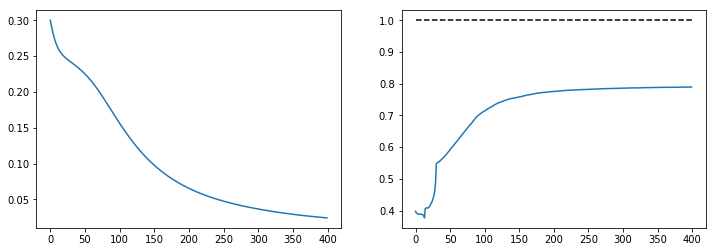

In [11]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1,2,1)
plt.plot(neural_net['cost_hist'])
plt.subplot(1,2,2)
plt.plot(neural_net['n_corr_hist']/n)
plt.plot([0,len(neural_net['n_corr_hist'])], [1,1], 'k--')

This scenario is not as good as the logistic regression. Why?

In [12]:
# filter out only 0, 1 ,2
X = mnist.data.astype(float)
y = mnist.target.astype(float) 
ind = (y < 3).nonzero()
ind = ind[0]
X = X[ind, :]
n = np.shape(X)[0]
y_vec = np.zeros((n,3))
for i in range(n):
    y_vec[i,int(y[ind[i]])] = 1

num_train = int(n * 0.8)
X_train = X[0:num_train, :].T
y_train = y_vec[0:num_train].T

X_train = X_train/256
X_test = X_test/256

In [13]:
params = initialise_param(m, n, n1 = 4, n2 = len(y_train))
neural_net = train_net_vec(X_train, y_train, params, max_iter = 1000, alpha = 1, verbose = False)

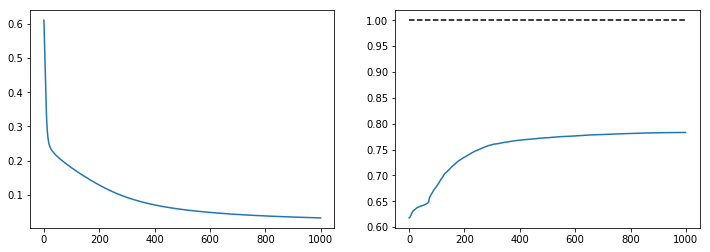

In [14]:
plt.figure(figsize=(12, 4)) 
plt.subplot(1,2,1)
plt.plot(neural_net['cost_hist'])
plt.subplot(1,2,2)
plt.plot(neural_net['n_corr_hist']/n)
plt.plot([0,len(neural_net['n_corr_hist'])], [1,1], 'k--')

Why is the performance not good? Inherent limitation of the number of layer?